## Filtration method 2 : Affinity Graph

In [4]:
import networkx as nx
import numpy as np
import random
from utils import *

In [43]:
G0 = nx.gnm_random_graph(10,20)
for (u,v) in G0.edges():
    G0.edges[u,v]['time'] = random.randint(0,100)

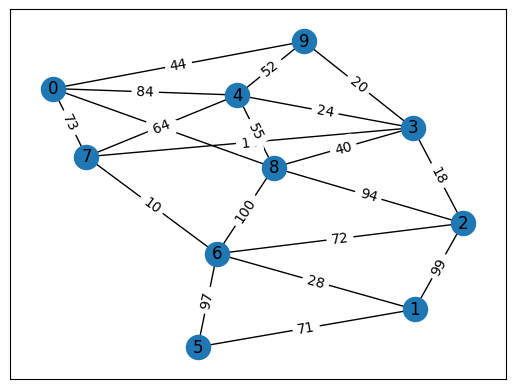

In [44]:
draw_with_labels(G0,'time')

In [47]:

def weighted_affinity(G0):
    vertex_list = range(G0.number_of_nodes())
    vertex_pairs = [(x, y) for x in vertex_list for y in vertex_list if x != y]
    edge_weight_dict = {}

    for pair in vertex_pairs:
        tr_paths = []
        paths = nx.all_simple_edge_paths(G0, source=pair[0], target=pair[1])
        if paths:
            for path in paths:
                time_list = {}
                for edge in path:
                    time_list[edge] = G0.edges[edge]['time']
                if all(list(time_list.values())[i] <= list(time_list.values())[i+1] for i in range(len(time_list) - 1)):
                    tr_paths.append(time_list)
        
        last_times = [list(d.values())[-1] for d in tr_paths]
        if last_times:
            t = min(last_times)
            edge_weight_dict[pair] = t
    
    new_dict = {}
    for key in edge_weight_dict.keys():
        a, b = key
        if (b, a) in edge_weight_dict:
            new_key = (a, b)
            new_value = max(edge_weight_dict[key], edge_weight_dict[(b, a)])
            new_dict[new_key] = new_value

    # Create an empty weighted graph
    G = nx.Graph()

    # Add edges from the dictionary with their weights
    for edge, weight in new_dict.items():
        G.add_edge(edge[0], edge[1], weight=weight)

    return G

In [48]:
G = weighted_affinity(G0)